# start

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### covert to int

In [3]:
def toint(value):
    return(int(value.replace(",","")))

### Read file
convert Areas to int

In [4]:
df = pd.read_csv("1632300362534233.csv")

for i in range(len(df["Area"].values)):
    df.loc[i,'Area'] = toint(df['Area'].values[i])


df = df.astype({"Area": np.int64})
        
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   int64  
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.2+ KB


<AxesSubplot:xlabel='Price(USD)', ylabel='Count'>

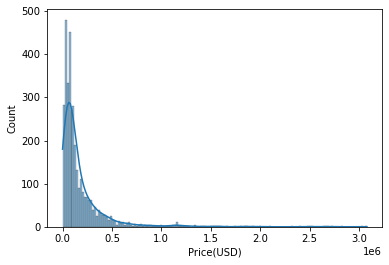

In [7]:
sb.histplot(data=df, x="Price(USD)", kde=True)

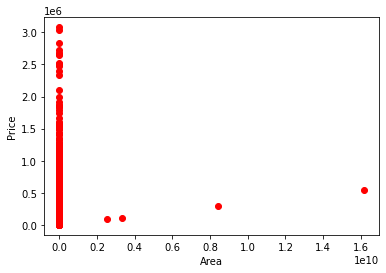

In [9]:
x_data, y_data = (df["Area"].values, df["Price(USD)"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()

#### Remove outliers

In [10]:
cdf = df[['Area','Room','Parking','Warehouse','Elevator', 'Address','Price','Price(USD)']]
msk_ = df["Area"].values <= int(np.quantile(df["Area"],0.75))
mainData = cdf[msk_]
mainData.head(9)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


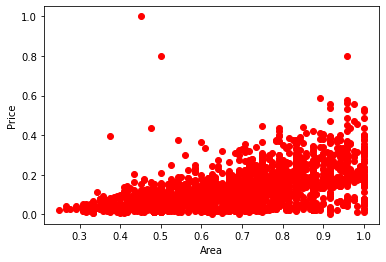

In [11]:
x_data, y_data = (mainData["Area"].values, mainData["Price(USD)"].values)
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)
plt.plot(xdata, ydata, 'ro')
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()

In [12]:
from sklearn.preprocessing import OrdinalEncoder

addr = ['Malard',
 'Robat Karim',
 'Pishva',
 'Nasim Shahr',
 'Shahedshahr',
 'Parand',
 'Firoozkooh',
 'Hassan Abad',
 'Vahidiyeh',
 'Pakdasht',
 'Baghestan',
 'Shahrake Quds',
 'Naziabad',
 'Ghiyamdasht',
 'Alborz Complex',
 'Khavaran',
 'Pardis',
 'Salehabad',
 'Firoozkooh Kuhsar',
 'Telecommunication',
 'Chahardangeh',
 'Shahrake Madaen',
 'Thirteen November',
 'Baqershahr',
 'Shahrake Qods',
 'Northern Chitgar',
 'Nezamabad',
 'Pakdasht KhatunAbad',
 'Aliabad South',
 'Southern Chitgar',
 'Andisheh',
 'Shahryar',
 'Kahrizak',
 'Shadabad',
 'Qarchak',
 'Safadasht',
 'Ray - Pilgosh',
 'Yakhchiabad',
 'Islamshahr',
 'Fallah',
 'Shoosh',
 'Beryanak',
 'Damavand',
 'Dolatabad',
 'Ahang',
 'Vahidieh',
 'Waterfall',
 'Komeil',
 'Atabak',
 'Karoon',
 'Bahar',
 'Rudhen',
 'Ray - Montazeri',
 'Yaftabad',
 'Salsabil',
 'Hashemi',
 'Razi',
 'Shahrake Azadi',
 'Golestan',
 'Qasr-od-Dasht',
 'Nawab',
 'Javadiyeh',
 'Jeyhoon',
 'Abuzar',
 'Enghelab',
 'Eskandari',
 'Qazvin Imamzadeh Hassan',
 'Hor Square',
 'Azarbaijan',
 'Boloorsazi',
 'Ray',
 'Azari',
 'Republic',
 'Si Metri Ji',
 'Valiasr',
 'Sabalan',
 'Tenant',
 'Amirieh',
 'Ostad Moein',
 'Parastar',
 'Afsarieh',
 'Tehransar',
 'Pirouzi',
 'Majidieh',
 'Tehran Now',
 'Moniriyeh',
 'East Pars',
 'Southern Suhrawardi',
 'Taslihat',
 'nan',
 'Narmak',
 'Elm-o-Sanat',
 'Persian Gulf Martyrs Lake',
 'Sadeghieh',
 'Shahrake Shahid Bagheri',
 'Mehrabad River River',
 'Dehkade Olampic',
 'Air force',
 'Railway',
 'Hakimiyeh',
 'Southern Program Organization',
 'East Ferdows Boulevard',
 'Haft Tir',
 'Darakeh',
 'West Ferdows Boulevard',
 'Koohsar',
 'Shahr-e-Ziba',
 'ShahrAra',
 'Shahran',
 'Eram',
 'Lavizan',
 'Northren Jamalzadeh',
 'Feiz Garden',
 'Heshmatieh',
 'Kazemabad',
 'Southern Janatabad',
 'Araj',
 'Water Organization',
 'Keshavarz Boulevard',
 'Punak',
 'Dezashib',
 'Karimkhan',
 'West Pars',
 'Abbasabad',
 'Northern Janatabad',
 'Shams Abad',
 'Central Janatabad',
 'Azadshahr',
 'North Program Organization',
 'Ekbatan',
 'Tarasht',
 'Kook',
 'Sattarkhan',
 'Amir Bahador',
 'Amirabad',
 'Fatemi',
 'Mirza Shirazi',
 'Darband',
 'Villa',
 'Ozgol',
 'Zibadasht',
 'Gisha',
 'Elahieh',
 'Abazar',
 'Zafar',
 'Dorous',
 'Aqdasieh',
 'Northern Suhrawardi',
 'Shahrakeh Naft',
 'Mehran',
 'Heravi',
 'Yousef Abad',
 'Saadat Abad',
 'Ekhtiarieh',
 'Marzdaran',
 'Qalandari',
 'Jordan',
 'Mirdamad',
 'Chidz',
 'Darabad',
 'Mahallati',
 'Ajudaniye',
 'Zargandeh',
 'Farmanieh',
 'Tajrish',
 'Pasdaran',
 'Gholhak',
 'Seyed Khandan',
 'Gheitarieh',
 'Kamranieh',
 'Niavaran',
 'Shahrake Gharb',
 'Hekmat',
 'Ghoba',
 'Mahmoudieh',
 'Velenjak',
 'Zaferanieh']
oe = OrdinalEncoder(categories=[addr])

not_null = mainData['Address'] != None
md = mainData[['Address']][not_null]     
md = md.astype({"Address": str})
md_all = mainData[not_null]
md_encoded = oe.fit_transform(md)

# convert address to code
li = []
for i in range(len(md_encoded)):
    li.append(int(md_encoded.tolist()[i][0]))
md_all['Address_Encode'] = li


print(max(md_encoded))
print(len(md_encoded))
print(len(md_all))
md_all

[176.]
2613
2613


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Address_Encode
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67,108
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67,108
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33,16
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,24
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33,128
...,...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67,115
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67,170
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67,5
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67,145


In [1]:
md_ = mainData[not_null]
md_ = md_.astype({"Address": str})

NameError: name 'mainData' is not defined

In [14]:
q = md_.groupby(md_['Address'])
sorted_adr = q.mean().sort_values(by='Price(USD)')
# sorted_adr.index.tolist()



Here we sorted the addresses from 0 to 176 and in order of the average price.
The chart below plots this information.

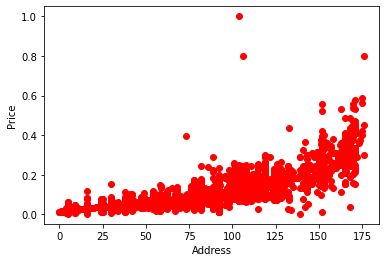

In [16]:
xdata, y_data = (md_all['Address_Encode'], md_all["Price"].values)
ydata = y_data/max(y_data)
plt.plot(xdata, ydata, 'ro')
plt.ylabel('Price')
plt.xlabel('Address')
plt.show()

<AxesSubplot:>

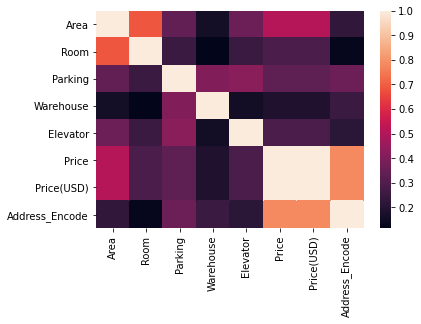

In [57]:
sb.heatmap(md_all.corr())

# start math

In [77]:
msk = np.random.rand(len(md_all)) < 0.8
train = md_all[msk]
test = md_all[~msk]

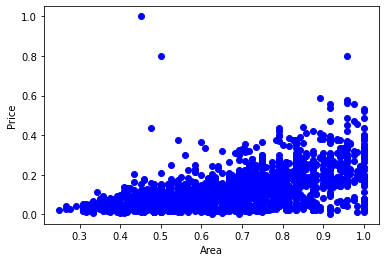

In [78]:
plt.scatter(train.Area/max(train.Area), train.Price/max(train.Price),  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

<AxesSubplot:xlabel='Area', ylabel='Price(USD)'>

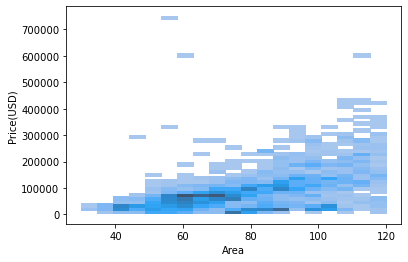

In [72]:
sb.histplot(train, x="Area", y="Price(USD)")

<AxesSubplot:xlabel='Address_Encode', ylabel='Price(USD)'>

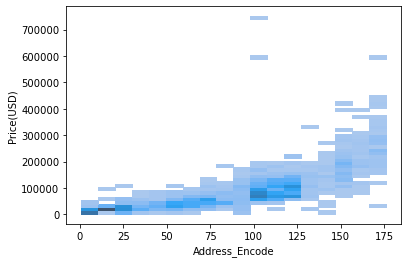

In [86]:
sb.histplot(train, x="Address_Encode", y="Price(USD)")

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='Parking', ylabel='Price(USD)'>

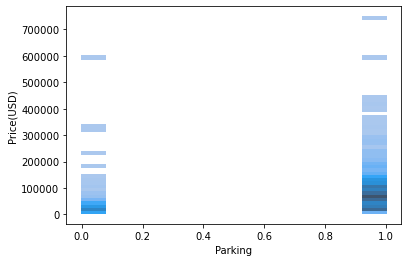

In [84]:
sb.histplot(train, x="Parking", y="Price(USD)")

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='Elevator', ylabel='Price(USD)'>

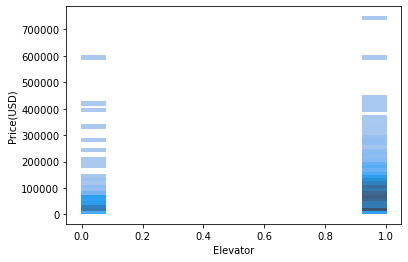

In [85]:
sb.histplot(train, x="Elevator", y="Price(USD)")

## Modeling

In [79]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area','Address_Encode','Parking','Elevator']])
train_y = np.asanyarray(train[['Price(USD)']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[  1224.71251071   1096.56686966 -10750.94729006   4407.3330537 ]]
Intercept:  [-100666.62783736]


In [80]:
y_hat= regr.predict(test[['Area','Address_Encode','Parking','Elevator']])
x = np.asanyarray(test[['Area','Address_Encode','Parking','Elevator']])
y = np.asanyarray(test[['Price(USD)']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 1010956275.48
Variance score: 0.80
